<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Samajwadi Party - SP</td>
<td style="text-align:right">
<a href="partywisewinresult-1680S24.htm">37</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">37</td>
</tr>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresult-369S24.htm">33</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td

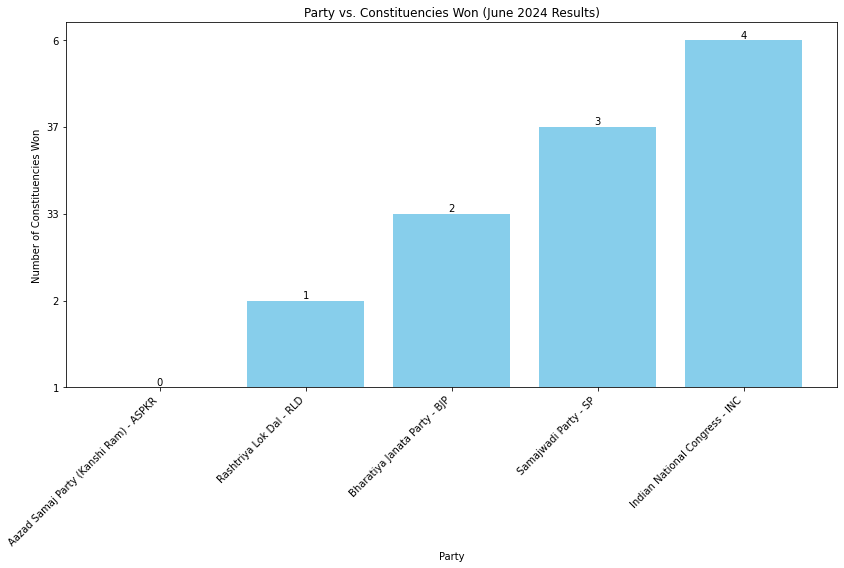

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

URL = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')
print(table)
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

data = []
for row in table.find('tbody').find_all('tr')[:-1]:
  data.append([td.text.strip() for td in row.find_all('td')])

df = pd.DataFrame(data, columns=headers)

print(df)
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.ylabel('Number of Constituencies Won')
plt.xlabel('Party')
plt.title('Party vs. Constituencies Won (June 2024 Results)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

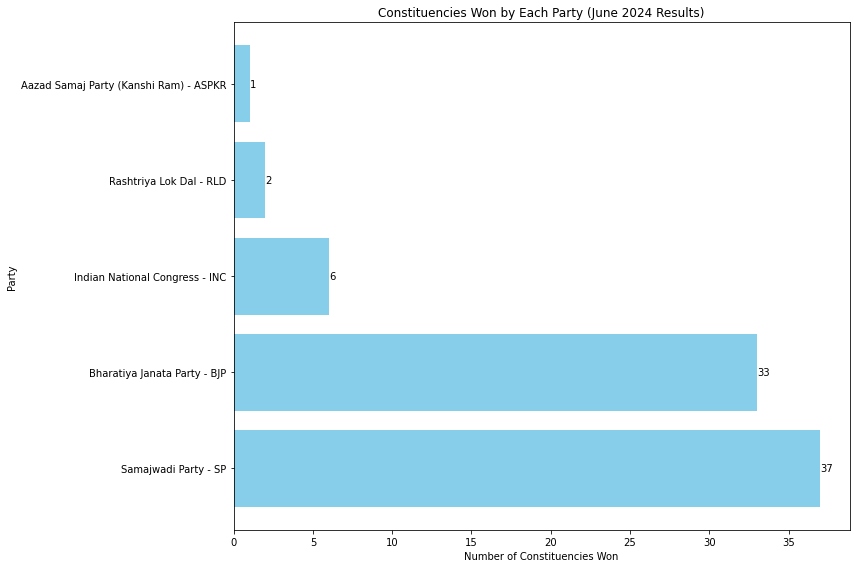

Scraped Data:
                                    Party  Won Leading Total
4  Aazad Samaj Party (Kanshi Ram) - ASPKR    1       0     1
3                 Rashtriya Lok Dal - RLD    2       0     2
2          Indian National Congress - INC    6       0     6
1            Bharatiya Janata Party - BJP   33       0    33
0                    Samajwadi Party - SP   37       0    37


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scrape data from the website
URL = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

# Extract table data
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 2: Data processing and visualization
df['Won'] = pd.to_numeric(df['Won'])  # Convert 'Won' column to numeric for sorting
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Party'], df_sorted['Won'], color='skyblue')

plt.xlabel('Number of Constituencies Won')
plt.ylabel('Party')
plt.title('Constituencies Won by Each Party (June 2024 Results)')

# Customize y-axis ticks
plt.yticks(np.arange(len(df_sorted['Party'])), df_sorted['Party'])
plt.gca().invert_yaxis()  # Invert y-axis to have the party with most wins at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the scraped data
print("Scraped Data:")
print(df_sorted)

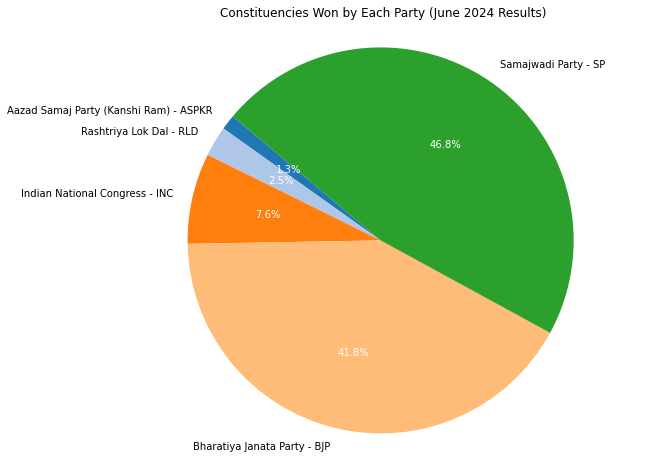

In [3]:
data = []
for row in table.find('tbody').find_all('tr')[:-1]:  # Exclude the last row which is total
    data.append([td.text.strip() for td in row.find_all('td')])

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert 'Won' column to numeric for sorting
df['Won'] = pd.to_numeric(df['Won'])

# Sort dataframe by 'Won' column in ascending order
df_sorted = df.sort_values(by='Won', ascending=True)

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Using the 'tab20' colormap for variety of colors

# Plot pie chart
wedges, texts, autotexts = plt.pie(df_sorted['Won'], labels=df_sorted['Party'], colors=colors,
                                   autopct='%1.1f%%', startangle=140)

plt.title('Constituencies Won by Each Party (June 2024 Results)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Customizing autotexts (percent labels) for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.show()

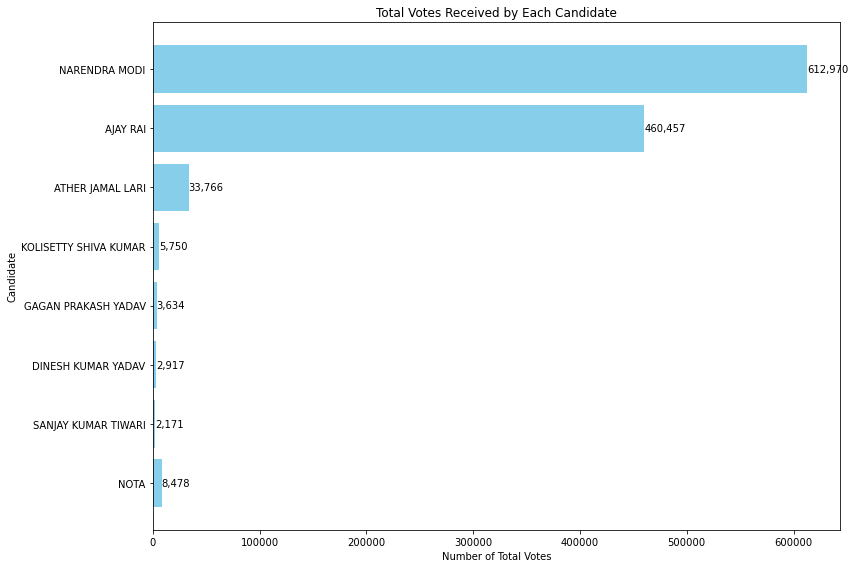

Scraped Data:
  S.N.              Candidate                     Party  EVM Votes  \
0    1          NARENDRA MODI    Bharatiya Janata Party     611439   
1    2               AJAY RAI  Indian National Congress     459084   
2    3       ATHER JAMAL LARI       Bahujan Samaj Party      33646   
3    4  KOLISETTY SHIVA KUMAR        Yuga Thulasi Party       5748   
4    5    GAGAN PRAKASH YADAV     Apna Dal (Kamerawadi)       3619   
5    6     DINESH KUMAR YADAV               Independent       2912   
6    7    SANJAY KUMAR TIWARI               Independent       2170   
7    8                   NOTA         None of the Above       8463   

   Postal Votes  Total Votes  % of Votes  
0          1531       612970       54.24  
1          1373       460457       40.74  
2           120        33766        2.99  
3             2         5750        0.51  
4            15         3634        0.32  
5             5         2917        0.26  
6             1         2171        0.19  
7          

In [4]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS2477.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

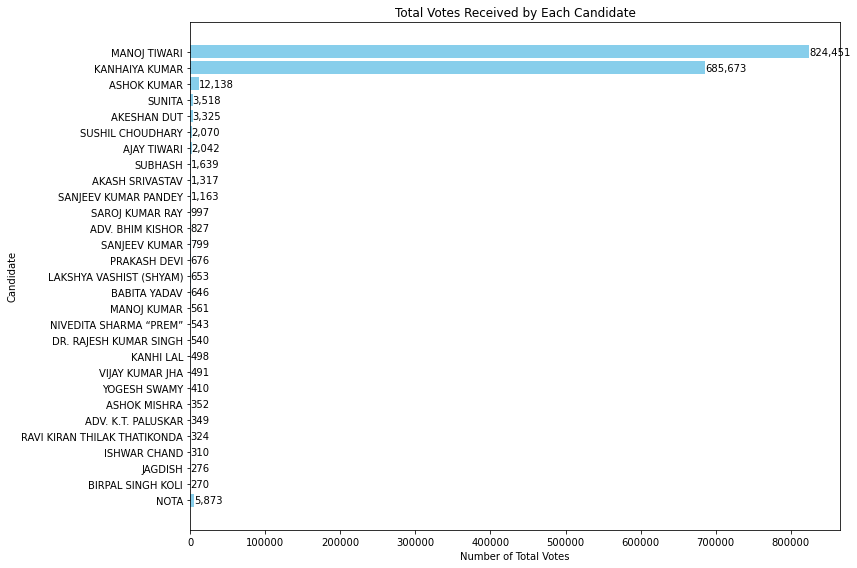

Scraped Data:
   S.N.                     Candidate  \
0     1                  MANOJ TIWARI   
1     2                KANHAIYA KUMAR   
2     3                   ASHOK KUMAR   
3     4                        SUNITA   
4     5                   AKESHAN DUT   
5     6              SUSHIL CHOUDHARY   
6     7                   AJAY TIWARI   
7     8                       SUBHASH   
8     9               AKASH SRIVASTAV   
9    10          SANJEEV KUMAR PANDEY   
10   11               SAROJ KUMAR RAY   
11   12              ADV. BHIM KISHOR   
12   13                 SANJEEV KUMAR   
13   14                  PRAKASH DEVI   
14   15       LAKSHYA VASHIST (SHYAM)   
15   16                  BABITA YADAV   
16   17                   MANOJ KUMAR   
17   18        NIVEDITA SHARMA “PREM”   
18   19        DR. RAJESH KUMAR SINGH   
19   20                     KANHI LAL   
20   21               VIJAY KUMAR JHA   
21   22                  YOGESH SWAMY   
22   23                  ASHOK MISHRA   
23

In [5]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseU052.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

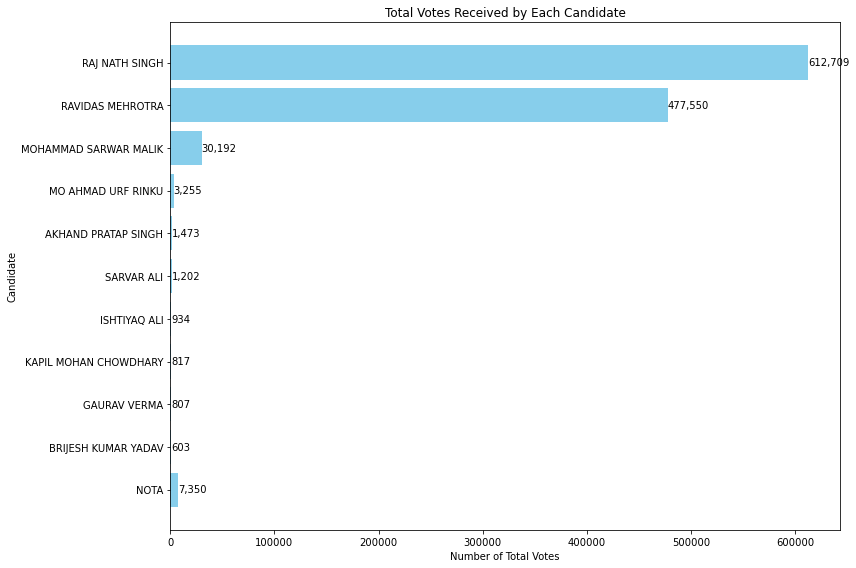

Scraped Data:
   S.N.              Candidate                             Party  EVM Votes  \
0     1         RAJ NATH SINGH            Bharatiya Janata Party     610597   
1     2       RAVIDAS MEHROTRA                   Samajwadi Party     476303   
2     3  MOHAMMAD SARWAR MALIK               Bahujan Samaj Party      29982   
3     4     MO AHMAD URF RINKU  Social Democratic Party Of India       3251   
4     5    AKHAND PRATAP SINGH                       Independent       1465   
5     6             SARVAR ALI                      Sarvar Party       1199   
6     7           ISHTIYAQ ALI                       Independent        929   
7     8  KAPIL MOHAN CHOWDHARY       Mera Adhikaar Rashtriya Dal        815   
8     9           GAURAV VERMA                 Hindu Samaj Party        801   
9    10    BRIJESH KUMAR YADAV                Kisan Vishwa Party        601   
10   11                   NOTA                 None of the Above       7316   

    Postal Votes  Total Votes  % of V

In [6]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS2435.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

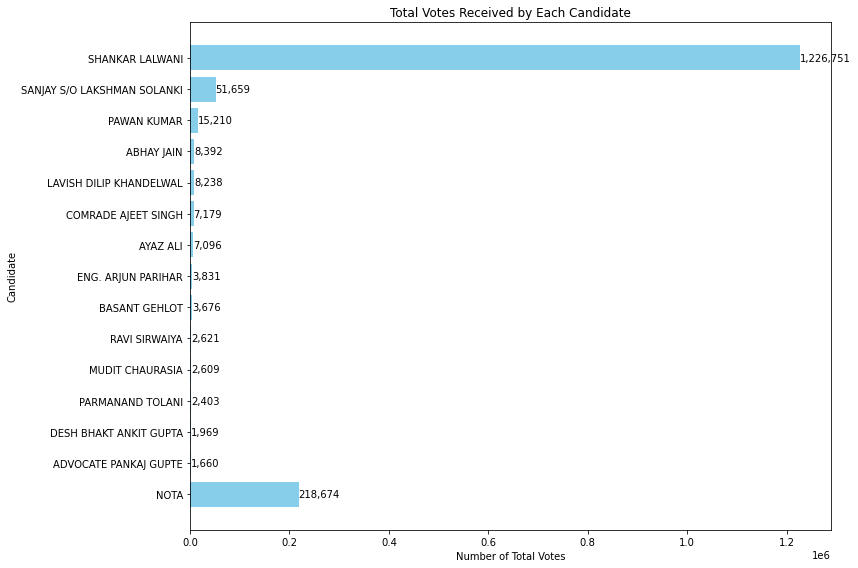

Scraped Data:
   S.N.                    Candidate  \
0     1              SHANKAR LALWANI   
1     2  SANJAY S/O LAKSHMAN SOLANKI   
2     3                  PAWAN KUMAR   
3     4                   ABHAY JAIN   
4     5      LAVISH DILIP KHANDELWAL   
5     6          COMRADE AJEET SINGH   
6     7                     AYAZ ALI   
7     8           ENG. ARJUN PARIHAR   
8     9                BASANT GEHLOT   
9    10                RAVI SIRWAIYA   
10   11              MUDIT CHAURASIA   
11   12             PARMANAND TOLANI   
12   13       DESH BHAKT ANKIT GUPTA   
13   14        ADVOCATE PANKAJ GUPTE   
14   15                         NOTA   

                                          Party  EVM Votes  Postal Votes  \
0                        Bharatiya Janata Party    1223746          3005   
1                           Bahujan Samaj Party      51486           173   
2                  Akhil Bhartiya Parivar Party      15182            28   
3                                   Indep

In [7]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS1226.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

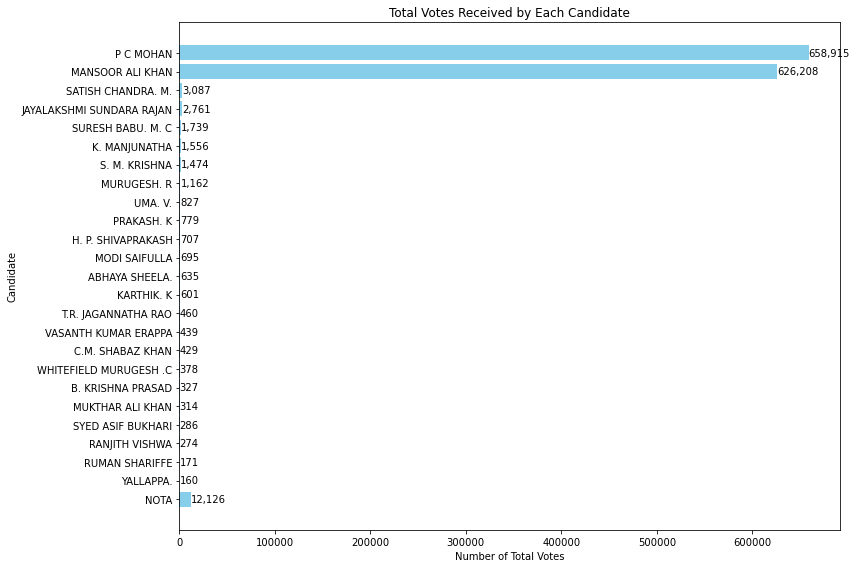

Scraped Data:
   S.N.                  Candidate  \
0     1                  P C MOHAN   
1     2           MANSOOR ALI KHAN   
2     3         SATISH CHANDRA. M.   
3     4  JAYALAKSHMI SUNDARA RAJAN   
4     5          SURESH BABU. M. C   
5     6              K. MANJUNATHA   
6     7              S. M. KRISHNA   
7     8                MURUGESH. R   
8     9                    UMA. V.   
9    10                 PRAKASH. K   
10   11         H. P. SHIVAPRAKASH   
11   12              MODI SAIFULLA   
12   13             ABHAYA SHEELA.   
13   14                 KARTHIK. K   
14   15        T.R. JAGANNATHA RAO   
15   16       VASANTH KUMAR ERAPPA   
16   17           C.M. SHABAZ KHAN   
17   18     WHITEFIELD MURUGESH .C   
18   19          B. KRISHNA PRASAD   
19   20           MUKTHAR ALI KHAN   
20   21          SYED ASIF BUKHARI   
21   22             RANJITH VISHWA   
22   23             RUMAN SHARIFFE   
23   24                  YALLAPPA.   
24   25                       NOTA  

In [8]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS1025.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

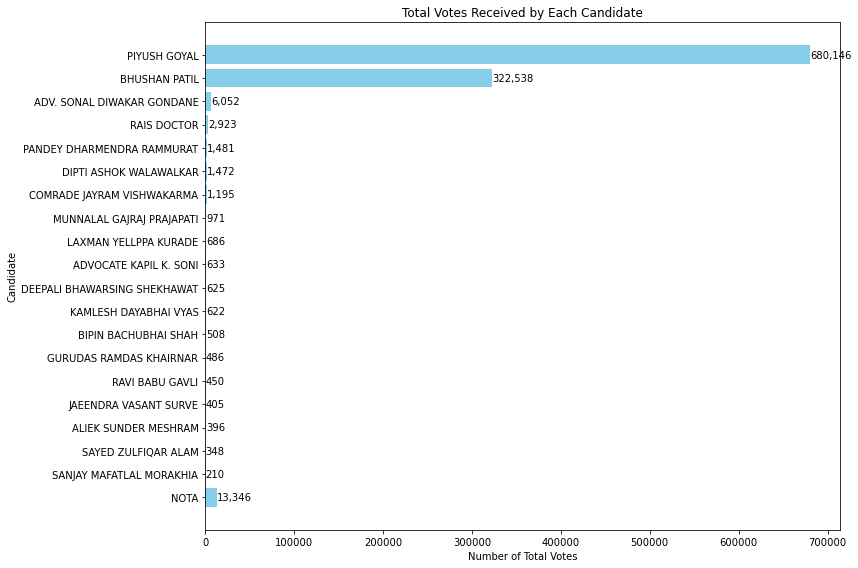

Scraped Data:
   S.N.                     Candidate  \
0     1                  PIYUSH GOYAL   
1     2                 BHUSHAN PATIL   
2     3    ADV. SONAL DIWAKAR GONDANE   
3     4                   RAIS DOCTOR   
4     5    PANDEY DHARMENDRA RAMMURAT   
5     6        DIPTI ASHOK WALAWALKAR   
6     7    COMRADE JAYRAM VISHWAKARMA   
7     8     MUNNALAL GAJRAJ PRAJAPATI   
8     9         LAXMAN YELLPPA KURADE   
9    10        ADVOCATE KAPIL K. SONI   
10   11  DEEPALI BHAWARSING SHEKHAWAT   
11   12         KAMLESH DAYABHAI VYAS   
12   13          BIPIN BACHUBHAI SHAH   
13   14       GURUDAS RAMDAS KHAIRNAR   
14   15               RAVI BABU GAVLI   
15   16         JAEENDRA VASANT SURVE   
16   17          ALIEK SUNDER MESHRAM   
17   18           SAYED ZULFIQAR ALAM   
18   19      SANJAY MAFATLAL MORAKHIA   
19   20                          NOTA   

                                          Party  EVM Votes  Postal Votes  \
0                        Bharatiya Janata Party 

In [9]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS1326.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)

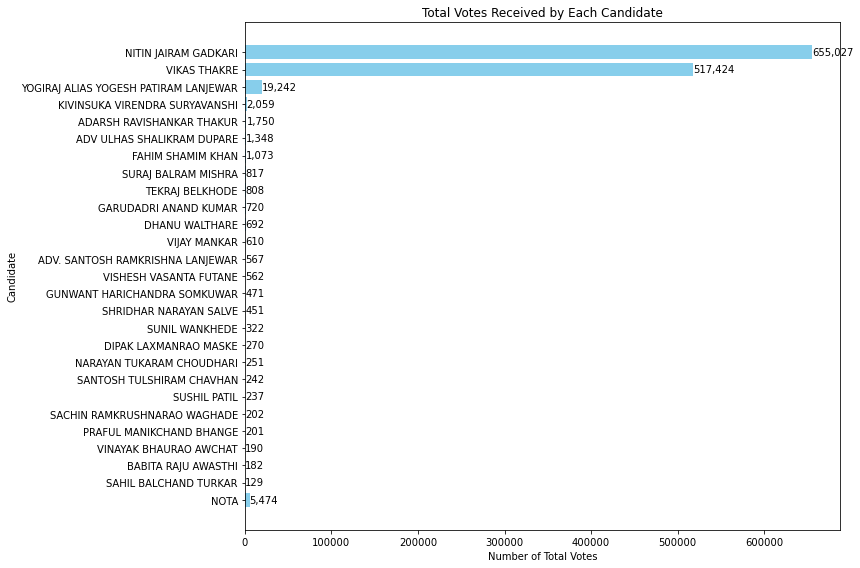

Scraped Data:
   S.N.                              Candidate  \
0     1                   NITIN JAIRAM GADKARI   
1     2                           VIKAS THAKRE   
2     3  YOGIRAJ ALIAS YOGESH PATIRAM LANJEWAR   
3     4         KIVINSUKA VIRENDRA SURYAVANSHI   
4     5              ADARSH RAVISHANKAR THAKUR   
5     6             ADV ULHAS SHALIKRAM DUPARE   
6     7                      FAHIM SHAMIM KHAN   
7     8                    SURAJ BALRAM MISHRA   
8     9                        TEKRAJ BELKHODE   
9    10                  GARUDADRI ANAND KUMAR   
10   11                         DHANU WALTHARE   
11   12                           VIJAY MANKAR   
12   13       ADV. SANTOSH RAMKRISHNA LANJEWAR   
13   14                 VISHESH VASANTA FUTANE   
14   15           GUNWANT HARICHANDRA SOMKUWAR   
15   16                 SHRIDHAR NARAYAN SALVE   
16   17                         SUNIL WANKHEDE   
17   18                  DIPAK LAXMANRAO MASKE   
18   19              NARAYAN TUKARAM

In [10]:
#analysis of Varanasi seat
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch HTML and Parse with BeautifulSoup
URL = "https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS1310.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Step 2: Extract Table Data
table = soup.find('table', class_='table-striped')  # Locate the table with the specified class
if table is None:
    raise ValueError(f"Could not find table with class 'table-striped' on the page {URL}")

# Extracting headers
headers = []
thead = table.find('thead')
if thead:
    headers = [th.text.strip() for th in thead.find_all('th')]

# Extracting rows from tbody
data = []
tbody = table.find('tbody')
if tbody:
    for row in tbody.find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Step 3: Data Processing
# Convert numeric columns to numeric types
numeric_columns = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')  # Remove commas in numbers

# Step 4: Visualization (Bar Graph)
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Candidate'], df['Total Votes'], color='skyblue')

plt.xlabel('Number of Total Votes')
plt.ylabel('Candidate')
plt.title('Total Votes Received by Each Candidate')

# Customize y-axis ticks
plt.yticks(np.arange(len(df['Candidate'])), df['Candidate'])
plt.gca().invert_yaxis()  # Invert y-axis to have the candidate with most votes at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Display the DataFrame
print("Scraped Data:")
print(df)